In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
train=pd.read_csv("train_data.csv",low_memory=False)

In [3]:
#先用皮尔逊系数粗略的选择出相关性系数的绝对值大于0.1的属性列，这样不需要训练过多不重要的属性列
#可以这么做而且不会破坏实验的控制变量原则，因为根据皮尔逊相关系数选择出的重要性排名前10的属性列
#它们与要预测的属性列的皮尔逊相关系数均大于0.1，可以当成步骤1中也进行了同样的取相关系数为0.1的操作
features = train.corr().columns[train.corr()['is_default'].abs()> 0.1]
features = features.drop('is_default')
features

Index(['year_of_loan', 'interest', 'employer_type', 'scoring_low',
       'scoring_high', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'sub_class', 'work_type', 'marriage',
       'offsprings'],
      dtype='object')

In [4]:
#使用随机森林模型进行拟合的过程
X_train = train[features]
y_train = train['is_default']
feat_labels = X_train.columns
feat_labels

Index(['year_of_loan', 'interest', 'employer_type', 'scoring_low',
       'scoring_high', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'sub_class', 'work_type', 'marriage',
       'offsprings'],
      dtype='object')

In [5]:
rf = RandomForestRegressor(n_estimators=100,max_depth=None)
#rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('rf', rf)])
rf.fit(X_train, y_train)

RandomForestRegressor()

 1. interest                       0.219864
 2. sub_class                      0.144355
 3. marriage                       0.129684
 4. scoring_high                   0.103561
 5. employer_type                  0.103087
 6. scoring_low                    0.102324
 7. work_type                      0.090732
 8. offsprings                     0.045623
 9. early_return_amount            0.042408
10. year_of_loan                   0.014571


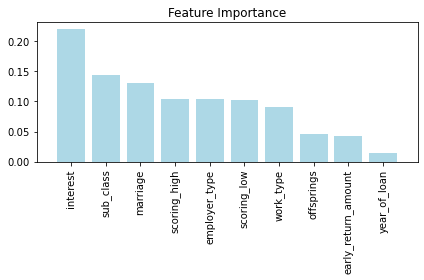

In [6]:
#根据随机森林模型的拟合结果选择特征
importance = rf.feature_importances_
 
#np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
imp_result = np.argsort(importance)[::-1][:10]
 
#按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    print("%2d. %-*s %f" % (i + 1, 30, feat_labels[imp_result[i]], importance[imp_result[i]]))
 
#对属性列，按属性重要性从高到低进行排序
feat_labels = [feat_labels[i] for i in imp_result]
#绘制特征重要性图像
plt.title('Feature Importance')
plt.bar(range(len(imp_result)), importance[imp_result], color='lightblue', align='center')
plt.xticks(range(len(imp_result)), feat_labels, rotation=90)
plt.xlim([-1, len(imp_result)])
plt.tight_layout()
plt.show()

In [13]:
feat_labels.append('is_default')
train[feat_labels]

,interest,sub_class,marriage,scoring_high,employer_type,scoring_low,work_type,offsprings,early_return_amount,year_of_loan,is_default
0,11.466,25,0.0,649.090909,1,556.363636,0.0,0.0,9927,3,0
1,16.841,25,0.0,893.750000,1,715.000000,0.0,0.0,0,5,0
2,8.900,35,0.0,903.636364,1,774.545455,0.0,0.0,0,3,0
3,4.788,35,0.0,875.000000,4,750.000000,0.0,0.0,0,3,0
4,12.790,25,0.0,710.606061,1,609.090909,0.0,0.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
758895,11.470,30,0.0,669.000000,3,665.000000,1.0,0.0,0,3,0
758896,6.030,31,0.0,774.000000,1,770.000000,2.0,0.0,810,3,0
758897,15.410,16,1.0,669.000000,1,665.000000,1.0,0.0,0,3,0
758898,9.440,26,3.0,679.000000,1,675.000000,0.0,2.0,0,3,0


In [16]:
feat_labels.append('debt_loan_ratio')
feat_labels.append('monthly_payment')
train[feat_labels]

,interest,sub_class,marriage,scoring_high,employer_type,scoring_low,work_type,offsprings,early_return_amount,year_of_loan,is_default,debt_loan_ratio,monthly_payment
0,11.466,25,0.0,649.090909,1,556.363636,0.0,0.0,9927,3,0,2.430000,1174.91
1,16.841,25,0.0,893.750000,1,715.000000,0.0,0.0,0,5,0,11.004545,670.69
2,8.900,35,0.0,903.636364,1,774.545455,0.0,0.0,0,3,0,6.409091,603.32
3,4.788,35,0.0,875.000000,4,750.000000,0.0,0.0,0,3,0,9.204545,602.30
4,12.790,25,0.0,710.606061,1,609.090909,0.0,0.0,0,3,0,15.578182,470.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758895,11.470,30,0.0,669.000000,3,665.000000,1.0,0.0,0,3,0,21.550000,395.55
758896,6.030,31,0.0,774.000000,1,770.000000,2.0,0.0,810,3,0,4.520000,365.23
758897,15.410,16,1.0,669.000000,1,665.000000,1.0,0.0,0,3,0,17.250000,348.67
758898,9.440,26,3.0,679.000000,1,675.000000,0.0,2.0,0,3,0,24.850000,230.44


In [17]:
train[feat_labels].to_csv("train.csv",encoding='utf-8-sig',index=False)